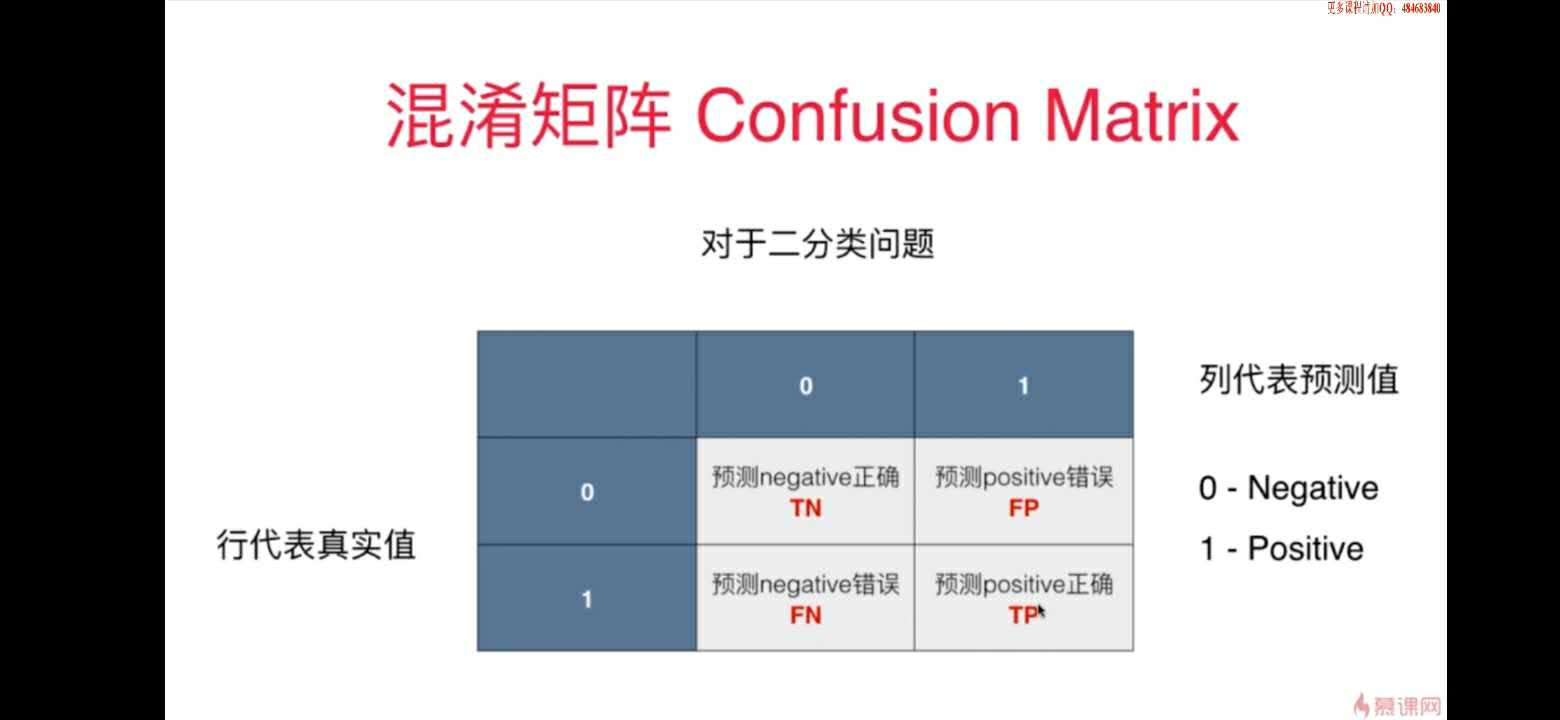

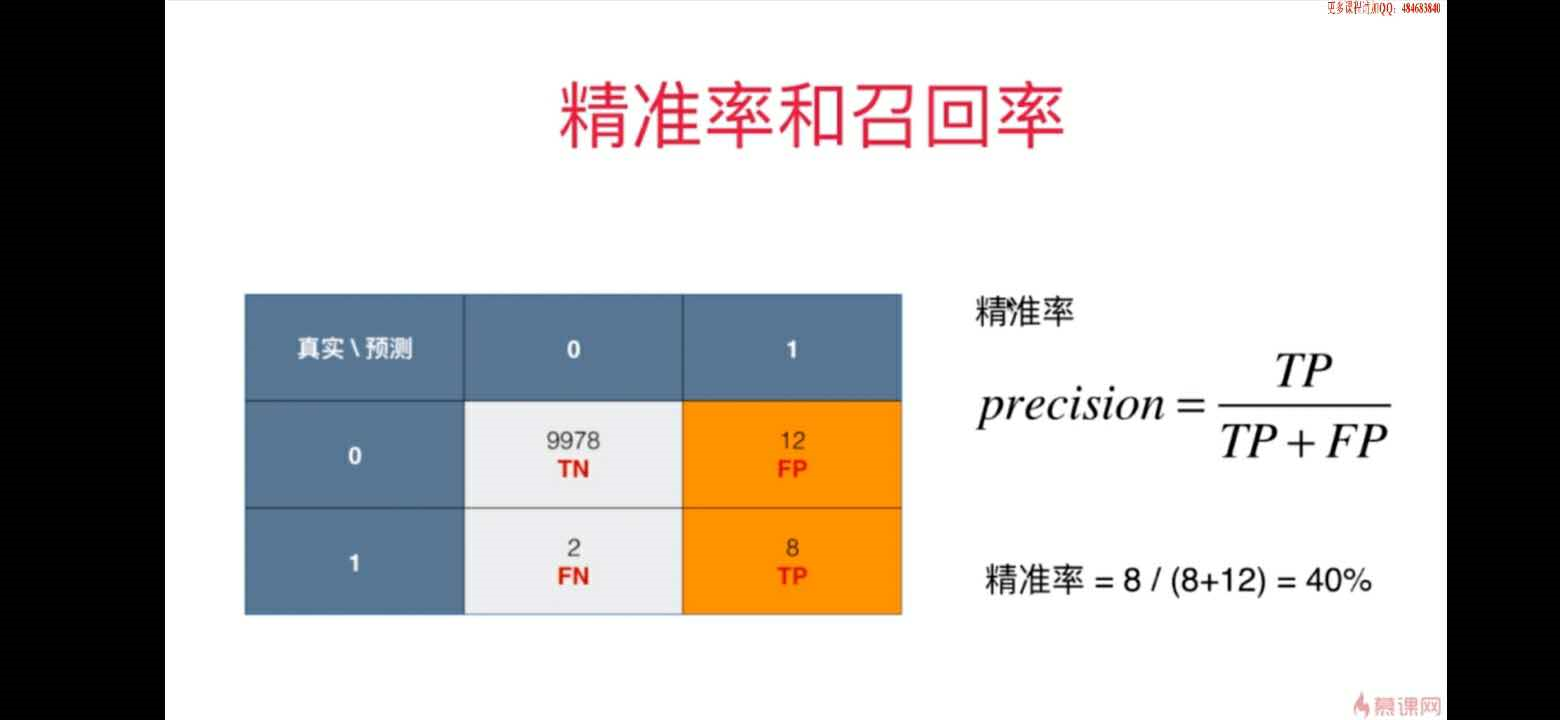

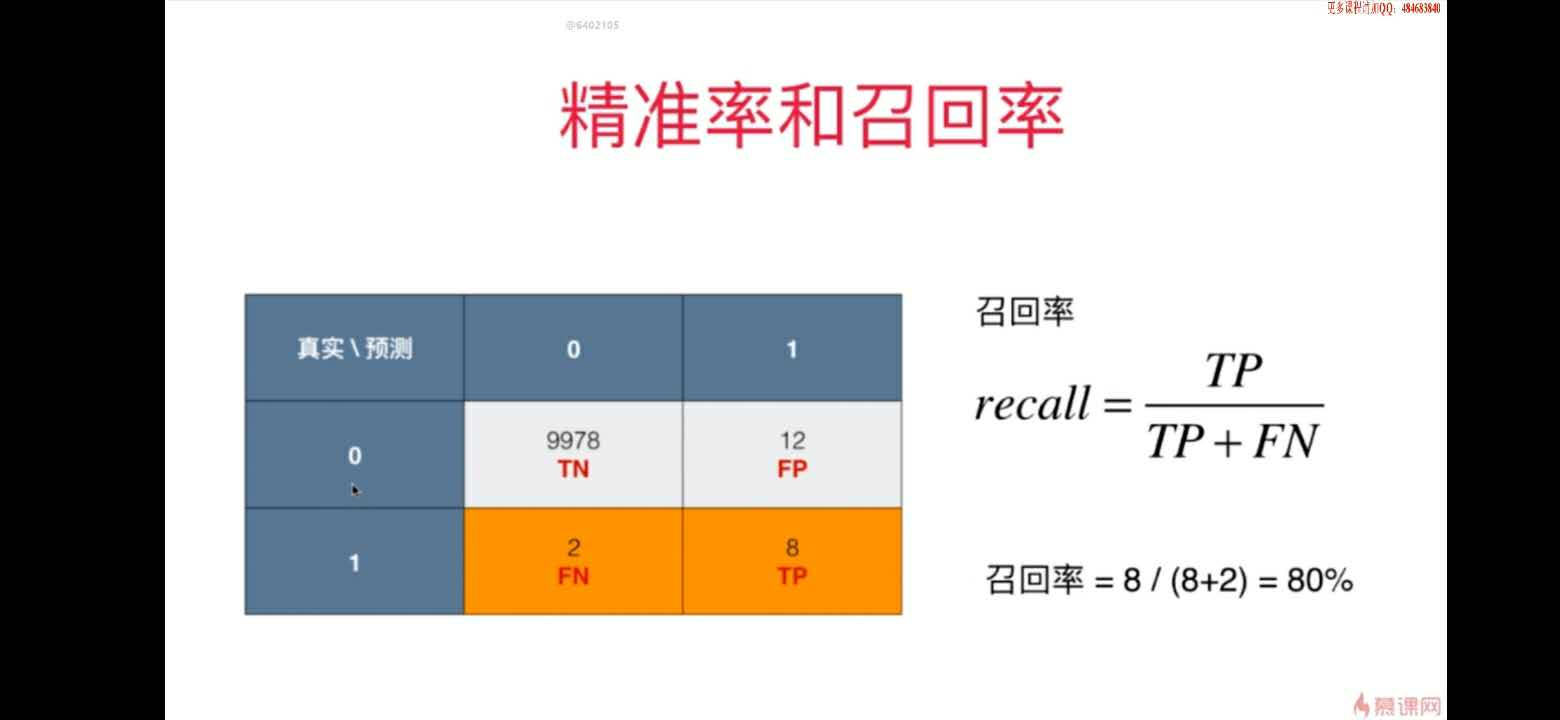

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
log_reg.score(X_test, y_test)

0.9755555555555555

In [6]:
y_pred = log_reg.predict(X_test)

In [7]:
def TN(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sum((y_true==0)&(y_pred==0))

TN(y_test, y_pred)

403

In [8]:
def TP(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sum((y_true==1)&(y_pred==1))

TP(y_test, y_pred)

36

In [9]:
def FP(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sum((y_true==0)&(y_pred==1))

FP(y_test, y_pred)

2

In [10]:
def FN(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sum((y_true==1)&(y_pred==0))

FN(y_test, y_pred)

9

In [13]:
def confusion_matrix(y_true, y_pred):
    return np.array([
        [TN(y_true, y_pred), FP(y_true, y_pred)],
        [FN(y_true, y_pred), TP(y_true, y_pred)]
    ])

confusion_matrix(y_test, y_pred)

array([[403,   2],
       [  9,  36]])

In [14]:
def precision_score(y_true, y_pred):
    tp = TP(y_true, y_pred)
    fp = FP(y_true, y_pred)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    
precision_score(y_test, y_pred)

0.9473684210526315

In [16]:
def recall_score(y_true, y_pred):
    tp = TP(y_true, y_pred)
    fn = FN(y_true, y_pred)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    
recall_score(y_test, y_pred)

0.8

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9473684210526315
0.8


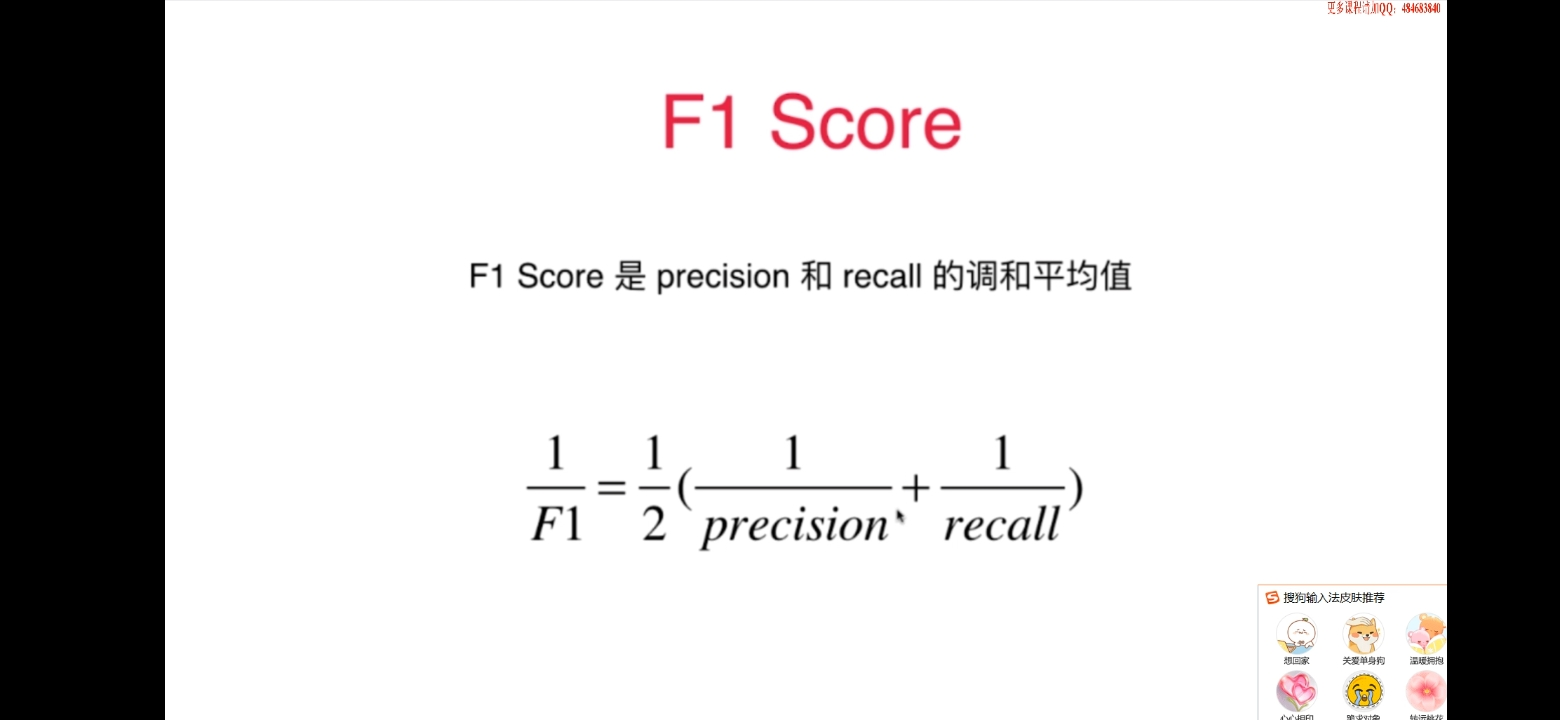

In [19]:
from sklearn.metrics import f1_score

In [20]:
f1_score(y_test, y_pred)

0.8674698795180723

In [22]:
log_reg.decision_function(X_test)[:10] # 每个样本对应的逻辑回归的score

array([-22.05699087, -33.02939266, -16.21333342, -80.37914433,
       -48.25125764, -24.54005261, -44.39169506, -25.04292105,
        -0.97829043, -19.71744116])

In [23]:
log_reg.predict(X_test)[:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
decision_scores = log_reg.decision_function(X_test)

In [26]:
np.max(decision_scores)

19.889583622212474

In [27]:
np.min(decision_scores)

-85.68607068148289

In [28]:
threshold = 5
y_pred2 = np.array(decision_scores >= 5, dtype="int")

In [29]:
confusion_matrix(y_test, y_pred2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [30]:
precision_score(y_test, y_pred2)

0.96

In [31]:
recall_score(y_test, y_pred2)

0.5333333333333333

In [34]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
precisions = []
recalls = []
for threshold in thresholds:
    y_pred = np.array(decision_scores >= threshold, dtype="int")
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

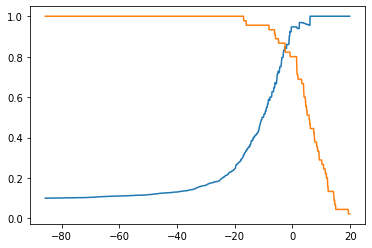

In [35]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

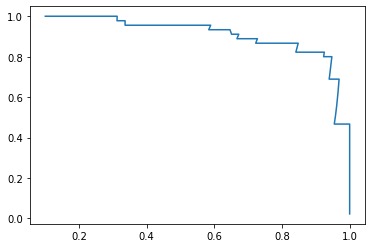

In [36]:
# precision-recall 曲线
plt.plot(precisions, recalls)
plt.show()

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [38]:
precisions.shape

(145,)

In [39]:
recalls.shape

(145,)

In [40]:
thresholds.shape

(144,)

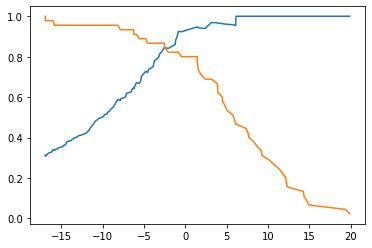

In [41]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

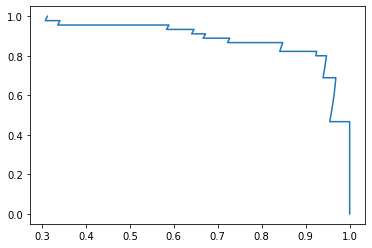

In [42]:
plt.plot(precisions, recalls)

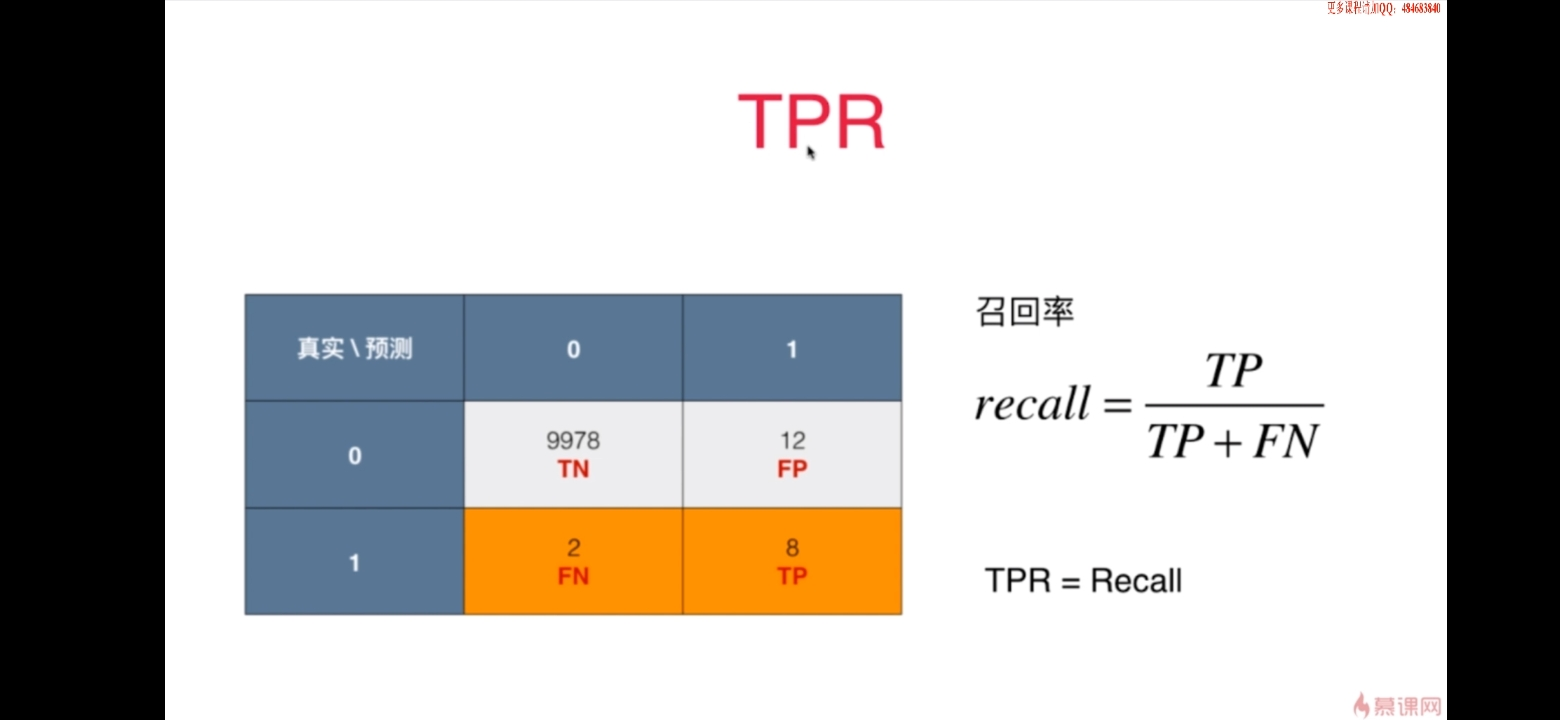

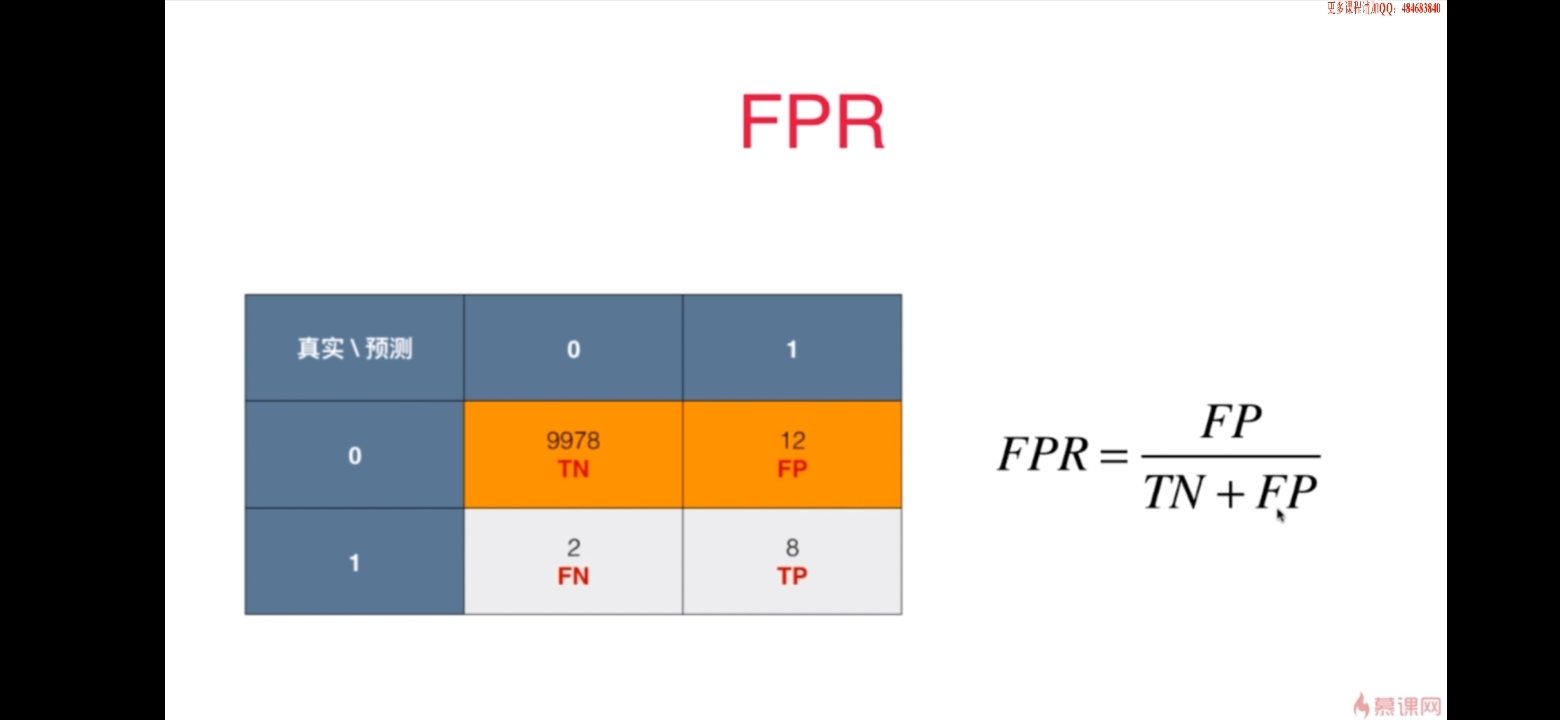

In [43]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

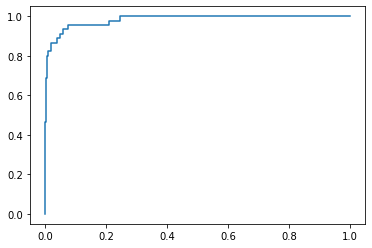

In [44]:
plt.plot(fprs, tprs)

In [45]:
from sklearn.metrics import roc_auc_score # area under curve

roc_auc_score(y_test, decision_scores) # roc 曲线面积

0.9830452674897119

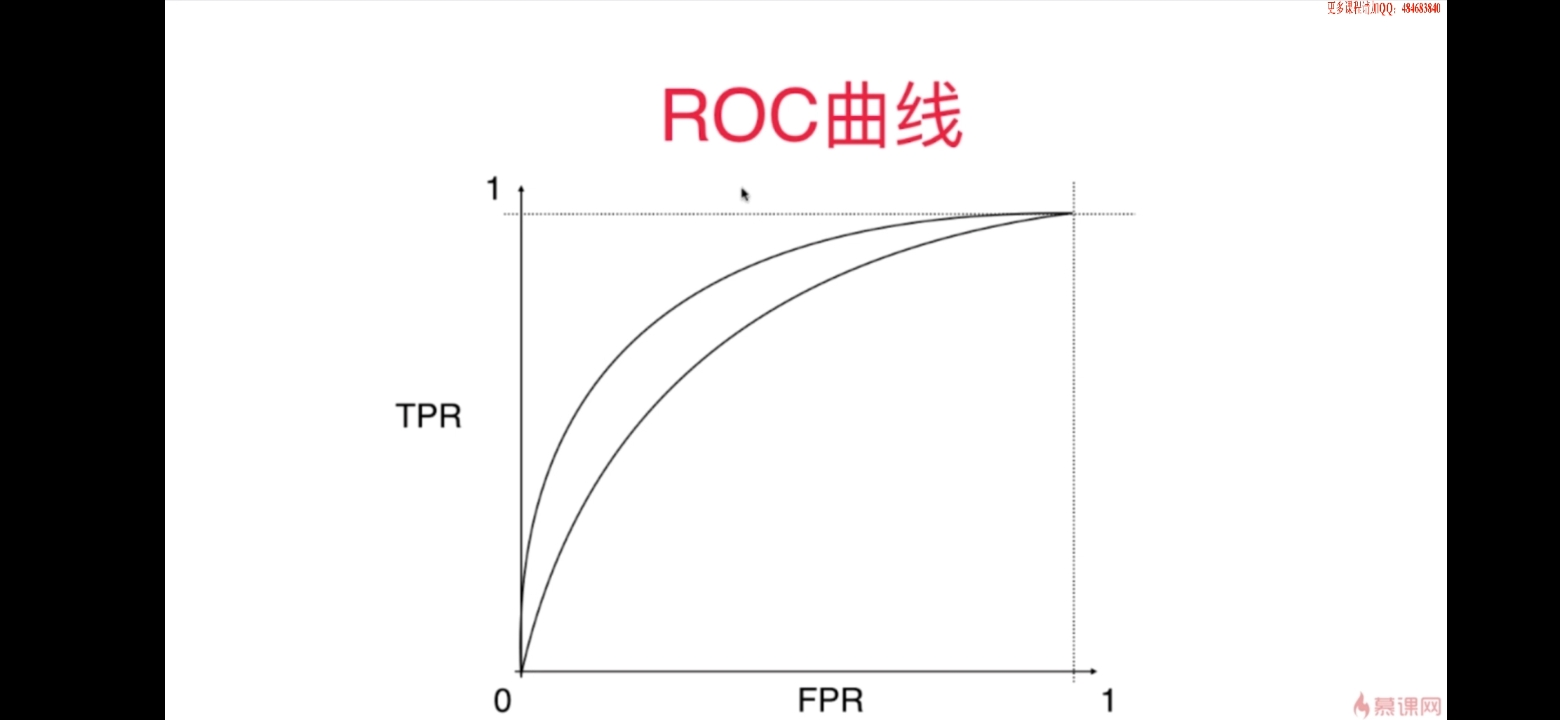

In [46]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score( X_test, y_test)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9555555555555556

In [47]:
y_pred = log_reg.predict(X_test)

In [48]:
precision_score(y_test, y_pred, average='micro') # 多分类计算精准率

0.9555555555555556

In [49]:
confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 49,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0,  0, 41]], dtype=int64)

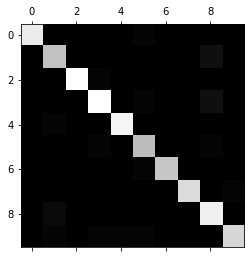

In [50]:
cfm = confusion_matrix(y_test, y_pred)
plt.matshow(cfm, cmap=plt.cm.gray) # matrix show， 映射为黑色， 颜色越亮， 数字越大

In [51]:
row_sums = np.sum(cfm, axis=1) # 按行加总
err_matrix = cfm / row_sums #  计算百分比
np.fill_diagonal(err_matrix, 0) # 对角线全部填充成0
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.025     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

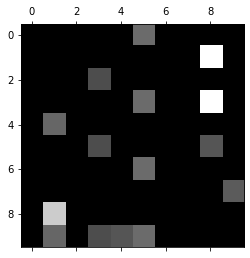

In [52]:
plt.matshow(err_matrix, cmap=plt.cm.gray) # matrix show， 映射为黑色， 颜色越亮， 数字越大